In [7]:
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b'customer_id,customer_bod,gender,phone_flag,student,employment,credit_card,balance,income,tenure\r\n9365,1999-10-22,Male,0.0,No,Salaried,1.0,0.0,4430744.15,0yrs 0mon\r\n999,1987-05-03,Female,0.0,No,Salaried,0.0,67431.4,3743149.53,0yrs 7mon\r\n2835,2000-10-20,Male,1.0,No,Salaried,1.0,69128.28,4821579.61,1yrs 11mon\r\n5821,1994-07-13,Male,1.0,No,Salaried,0.0,151051.78,3159764.69,0yrs 10mon\r\n2330,1996-10-03,Male,0.0,No,Self Employed,0.0,92727.85,5659353.2,1yrs 3mon\r\n5753,2003-08-17,Male,0.0,Yes,,0.0,178980.9,2836339.78,2yrs 5mon\r\n7063,1992-06-17,Female,1.0,No,Salaried,0.0,58252.85,4638774.56,2yrs 4mon\r\n2007,1999-01-25,Male,0.0,No,Salaried,0.0,91757.42,5892113.81,4yrs 0mon\r\n9600,1981-06-03,Male,0.0,No,Salaried,1.0,561.53,5348604.75,0yrs 7mon\r\n4682,1999-02-21,Male,1.0,No,Self Employed,0.0,178616.39,4374866.79,4yrs 3mon\r\n7814,1999-12-22,Male,1.0,No,Self Employed,0.0,191762.5,4699603.33,4yrs 8mon\r\n7488,1984-10-17,Female,1.0,No,Salaried,0.0,0.0,4892751.22,0yrs 0mo

In [8]:
import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/file_competition-1633448692693.rar
/content/train.csv
/content/test.csv
/content/.config/.last_survey_prompt.yaml
/content/.config/config_sentinel
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/active_config
/content/.config/gce
/content/.config/logs/2021.10.08/13.44.27.879250.log
/content/.config/logs/2021.10.08/13.45.08.864173.log
/content/.config/logs/2021.10.08/13.44.50.952139.log
/content/.config/logs/2021.10.08/13.44.44.548229.log
/content/.config/logs/2021.10.08/13.45.09.534390.log
/content/.config/logs/2021.10.08/13.44.08.162145.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv


In [10]:
import pandas as pd
import numpy as np

In [71]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [72]:
train.head()

,customer_id,customer_bod,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default
0,8300,1993-08-17,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,4yrs 4mon,0
1,672,2007-12-17,Female,1.0,Yes,NaN,0.0,89236.34,2266076.58,4yrs 1mon,0
2,5670,2000-02-05,Female,1.0,Yes,NaN,0.0,171553.12,1779347.34,0yrs 9mon,0
3,2975,1999-11-16,Female,1.0,Yes,NaN,0.0,85979.04,2014246.24,1yrs 8mon,0
4,3883,1977-08-18,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0yrs 10mon,0


In [73]:
test.head()

,customer_id,customer_bod,gender,phone_flag,student,employment,credit_card,balance,income,tenure
0,9365,1999-10-22,Male,0.0,No,Salaried,1.0,0.00,4430744.15,0yrs 0mon
1,999,1987-05-03,Female,0.0,No,Salaried,0.0,67431.40,3743149.53,0yrs 7mon
2,2835,2000-10-20,Male,1.0,No,Salaried,1.0,69128.28,4821579.61,1yrs 11mon
3,5821,1994-07-13,Male,1.0,No,Salaried,0.0,151051.78,3159764.69,0yrs 10mon
4,2330,1996-10-03,Male,0.0,No,Self Employed,0.0,92727.85,5659353.20,1yrs 3mon


In [74]:
y_train = train['default']
X_train = train.drop('default', axis=1)
X_test = test

In [85]:
X_train['customer_bod'].isnull().values.any()

False

In [87]:
X_train['gender'].isnull().values.any()
#isi dengan modus

True

In [88]:
X_train['student'].isnull().values.any()

False

In [130]:
X_train['employment'].isna().values.any()
#isi dengan modus

False

In [91]:
X_train['credit_card'].isnull().values.any()
#isi dengan modus

True

In [92]:
X_train['balance'].isnull().values.any()

False

In [93]:
X_train['income'].isnull().values.any()

False

In [94]:
X_train['tenure'].isnull().values.any()

False

In [103]:
X_train['employment'].fillna(X_train['employment'].mode()[0], inplace=True)
X_train['gender'].fillna(X_train['gender'].mode()[0], inplace=True)
X_train['credit_card'].fillna(X_train['credit_card'].mode()[0], inplace=True)

In [133]:
X_test['employment'].fillna(X_test['employment'].mode()[0], inplace=True)
X_test['gender'].fillna(X_test['gender'].mode()[0], inplace=True)
X_test['credit_card'].fillna(X_test['credit_card'].mode()[0], inplace=True)

In [127]:
X_train.isnull().values.any()

False

In [134]:
X_test.isnull().values.any()

False

In [111]:
X_train = X_train.drop(columns=['customer_id'])

In [112]:
X_test = X_test.drop(columns=['customer_id'])

In [113]:
X_train.dtypes

customer_bod     object
gender           object
phone_flag      float64
student          object
employment       object
credit_card     float64
balance         float64
income          float64
tenure           object
dtype: object

In [146]:
X_train['customer_bod'] =  pd.to_datetime(X_train['customer_bod'])
X_train

,customer_bod,gender,phone_flag,student,employment,credit_card,balance,income,tenure
0,1993-08-17,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,4yrs 4mon
1,2007-12-17,Female,1.0,Yes,Salaried,0.0,89236.34,2266076.58,4yrs 1mon
2,2000-02-05,Female,1.0,Yes,Salaried,0.0,171553.12,1779347.34,0yrs 9mon
3,1999-11-16,Female,1.0,Yes,Salaried,0.0,85979.04,2014246.24,1yrs 8mon
4,1977-08-18,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0yrs 10mon
...,...,...,...,...,...,...,...,...,...
3688,2001-03-05,Female,0.0,No,Salaried,0.0,144844.88,5060638.68,0yrs 9mon
3689,2004-08-13,Female,1.0,Yes,Self Employed,0.0,192978.31,2682965.60,1yrs 6mon
3690,2002-04-20,Male,1.0,Yes,Salaried,0.0,141840.01,2172340.05,1yrs 0mon
3691,1978-11-13,Male,1.0,No,Salaried,0.0,69477.43,5556566.10,4yrs 9mon


In [147]:
X_test['customer_bod'] =  pd.to_datetime(X_test['customer_bod'])
X_test

,customer_bod,gender,phone_flag,student,employment,credit_card,balance,income,tenure
0,1999-10-22,Male,0.0,No,Salaried,1.0,0.00,4430744.15,0yrs 0mon
1,1987-05-03,Female,0.0,No,Salaried,0.0,67431.40,3743149.53,0yrs 7mon
2,2000-10-20,Male,1.0,No,Salaried,1.0,69128.28,4821579.61,1yrs 11mon
3,1994-07-13,Male,1.0,No,Salaried,0.0,151051.78,3159764.69,0yrs 10mon
4,1996-10-03,Male,0.0,No,Self Employed,0.0,92727.85,5659353.20,1yrs 3mon
...,...,...,...,...,...,...,...,...,...
302,2003-01-18,Female,1.0,Yes,Self Employed,0.0,163303.88,2677311.54,0yrs 8mon
303,2002-01-14,Male,1.0,Yes,Salaried,0.0,118865.19,1487818.87,0yrs 10mon
304,2010-01-08,Female,1.0,Yes,Salaried,0.0,165272.36,2049269.05,1yrs 4mon
305,2002-04-15,Female,0.0,Yes,Salaried,0.0,212516.33,1917064.46,4yrs 3mon


In [115]:
new_train = X_train["tenure"].str.split(" ", n = 1, expand = True)
new_train.columns = new_train.columns.astype(str)
new_train.rename(columns={'0': 'years', '1':'mons'}, inplace=True)
new_train['years'] = new_train['years'].str.replace('yrs','')
new_train['mons'] = new_train['mons'].str.replace('mon','')
new_train

,years,mons
0,4,4
1,4,1
2,0,9
3,1,8
4,0,10
...,...,...
3688,0,9
3689,1,6
3690,1,0
3691,4,9


In [116]:
new_test = X_test["tenure"].str.split(" ", n = 1, expand = True)
new_test.columns = new_test.columns.astype(str)
new_test.rename(columns={'0': 'years', '1':'mons'}, inplace=True)
new_test['years'] = new_test['years'].str.replace('yrs','')
new_test['mons'] = new_test['mons'].str.replace('mon','')
new_test

,years,mons
0,0,0
1,0,7
2,1,11
3,0,10
4,1,3
...,...,...
302,0,8
303,0,10
304,1,4
305,4,3


In [120]:
new_train = new_train.astype(str).astype(int)
new_train.dtypes

years    int64
mons     int64
dtype: object

In [121]:
new_test = new_test.astype(str).astype(int)
new_test.dtypes

years    int64
mons     int64
dtype: object

In [136]:
#tenure month/12
new_train['mons'] = new_train['mons'].div(12).round(2)
new_test['mons'] = new_test['mons'].div(12).round(2)
#combine tenure
ten_train = new_train['years'] + new_train['mons']
ten_test = new_test['years'] + new_test['mons']
ten_train

0       4.33
1       4.08
2       0.75
3       1.67
4       0.83
        ... 
3688    0.75
3689    1.50
3690    1.00
3691    4.75
3692    0.75
Length: 3693, dtype: float64

In [186]:
#add to main df
fix_train = pd.concat([X_train, ten_train], axis=1, join='inner')
fix_train.columns = fix_train.columns.astype(str)
fix_train.rename(columns={'0': 'tenure (int)'}, inplace=True)
fix_train = fix_train.drop(columns=['tenure'])
fix_train

,customer_bod,gender,phone_flag,student,employment,credit_card,balance,income,tenure (int)
0,1993-08-17,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,4.33
1,2007-12-17,Female,1.0,Yes,Salaried,0.0,89236.34,2266076.58,4.08
2,2000-02-05,Female,1.0,Yes,Salaried,0.0,171553.12,1779347.34,0.75
3,1999-11-16,Female,1.0,Yes,Salaried,0.0,85979.04,2014246.24,1.67
4,1977-08-18,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0.83
...,...,...,...,...,...,...,...,...,...
3688,2001-03-05,Female,0.0,No,Salaried,0.0,144844.88,5060638.68,0.75
3689,2004-08-13,Female,1.0,Yes,Self Employed,0.0,192978.31,2682965.60,1.50
3690,2002-04-20,Male,1.0,Yes,Salaried,0.0,141840.01,2172340.05,1.00
3691,1978-11-13,Male,1.0,No,Salaried,0.0,69477.43,5556566.10,4.75


In [187]:
#add to main df
fix_test = pd.concat([X_test, ten_test], axis=1, join='inner')
fix_test.columns = fix_test.columns.astype(str)
fix_test.rename(columns={'0': 'tenure (int)'}, inplace=True)
fix_test = fix_test.drop(columns=['tenure'])
fix_test

,customer_bod,gender,phone_flag,student,employment,credit_card,balance,income,tenure (int)
0,1999-10-22,Male,0.0,No,Salaried,1.0,0.00,4430744.15,0.00
1,1987-05-03,Female,0.0,No,Salaried,0.0,67431.40,3743149.53,0.58
2,2000-10-20,Male,1.0,No,Salaried,1.0,69128.28,4821579.61,1.92
3,1994-07-13,Male,1.0,No,Salaried,0.0,151051.78,3159764.69,0.83
4,1996-10-03,Male,0.0,No,Self Employed,0.0,92727.85,5659353.20,1.25
...,...,...,...,...,...,...,...,...,...
302,2003-01-18,Female,1.0,Yes,Self Employed,0.0,163303.88,2677311.54,0.67
303,2002-01-14,Male,1.0,Yes,Salaried,0.0,118865.19,1487818.87,0.83
304,2010-01-08,Female,1.0,Yes,Salaried,0.0,165272.36,2049269.05,1.33
305,2002-04-15,Female,0.0,Yes,Salaried,0.0,212516.33,1917064.46,4.25


In [188]:
#bod to age
#Get today's date
import datetime

# Creating dataframe
dfage_train = pd.DataFrame(data = fix_train['customer_bod'])
  
# This function converts given date to age
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
  
dfage_train = dfage_train['customer_bod'].apply(lambda x: from_dob_to_age(x))

In [189]:
dfage_train.head()

0    28
1    13
2    21
3    21
4    44
Name: customer_bod, dtype: int64

In [190]:
#add to main df
fix_train = pd.concat([fix_train, dfage_train], axis=1, join='inner')

#drop first column
fix_train = fix_train.iloc[: , 1:]

#rename
fix_train.rename(columns={'customer_bod': 'age'}, inplace=True)

fix_train

,gender,phone_flag,student,employment,credit_card,balance,income,tenure (int),age
0,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,4.33,28
1,Female,1.0,Yes,Salaried,0.0,89236.34,2266076.58,4.08,13
2,Female,1.0,Yes,Salaried,0.0,171553.12,1779347.34,0.75,21
3,Female,1.0,Yes,Salaried,0.0,85979.04,2014246.24,1.67,21
4,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0.83,44
...,...,...,...,...,...,...,...,...,...
3688,Female,0.0,No,Salaried,0.0,144844.88,5060638.68,0.75,20
3689,Female,1.0,Yes,Self Employed,0.0,192978.31,2682965.60,1.50,17
3690,Male,1.0,Yes,Salaried,0.0,141840.01,2172340.05,1.00,19
3691,Male,1.0,No,Salaried,0.0,69477.43,5556566.10,4.75,42


In [191]:
#bod to age
#Get today's date
import datetime

# Creating dataframe
dfage_test = pd.DataFrame(data = fix_test['customer_bod'])
  
# This function converts given date to age
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
  
dfage_test = dfage_test['customer_bod'].apply(lambda x: from_dob_to_age(x))

In [192]:
dfage_test.head()

0    21
1    34
2    20
3    27
4    25
Name: customer_bod, dtype: int64

In [193]:
#add to main df
fix_test = pd.concat([fix_test, dfage_test], axis=1, join='inner')

#drop first column
fix_test = fix_test.iloc[: , 1:]

#rename
fix_test.rename(columns={'customer_bod': 'age'}, inplace=True)

fix_test

,gender,phone_flag,student,employment,credit_card,balance,income,tenure (int),age
0,Male,0.0,No,Salaried,1.0,0.00,4430744.15,0.00,21
1,Female,0.0,No,Salaried,0.0,67431.40,3743149.53,0.58,34
2,Male,1.0,No,Salaried,1.0,69128.28,4821579.61,1.92,20
3,Male,1.0,No,Salaried,0.0,151051.78,3159764.69,0.83,27
4,Male,0.0,No,Self Employed,0.0,92727.85,5659353.20,1.25,25
...,...,...,...,...,...,...,...,...,...
302,Female,1.0,Yes,Self Employed,0.0,163303.88,2677311.54,0.67,18
303,Male,1.0,Yes,Salaried,0.0,118865.19,1487818.87,0.83,19
304,Female,1.0,Yes,Salaried,0.0,165272.36,2049269.05,1.33,11
305,Female,0.0,Yes,Salaried,0.0,212516.33,1917064.46,4.25,19


#INGAT
* phone flag ke dummy
* credit card ke dummy

In [ ]:
#credit card to object

#phone flag to object

In [196]:
fixfix_train = pd.get_dummies(fix_train)
fixfix_test = pd.get_dummies(fix_test)

In [197]:
fixfix_train

,phone_flag,credit_card,balance,income,tenure (int),age,gender_Female,gender_Male,student_No,student_Yes,employment_Salaried,employment_Self Employed
0,1.0,1.0,87104.12,5015120.75,4.33,28,1,0,1,0,0,1
1,1.0,0.0,89236.34,2266076.58,4.08,13,1,0,0,1,1,0
2,1.0,0.0,171553.12,1779347.34,0.75,21,1,0,0,1,1,0
3,1.0,0.0,85979.04,2014246.24,1.67,21,1,0,0,1,1,0
4,1.0,0.0,48874.77,5445148.31,0.83,44,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3688,0.0,0.0,144844.88,5060638.68,0.75,20,1,0,1,0,1,0
3689,1.0,0.0,192978.31,2682965.60,1.50,17,1,0,0,1,0,1
3690,1.0,0.0,141840.01,2172340.05,1.00,19,0,1,0,1,1,0
3691,1.0,0.0,69477.43,5556566.10,4.75,42,0,1,1,0,1,0


In [237]:
fixfix_train = fixfix_train.astype(float)
fixfix_test = fixfix_test.astype(float)
fixfix_train.dtypes

phone_flag                  float64
credit_card                 float64
balance                     float64
income                      float64
tenure (int)                float64
age                         float64
gender_Female               float64
gender_Male                 float64
student_No                  float64
student_Yes                 float64
employment_Salaried         float64
employment_Self Employed    float64
dtype: object

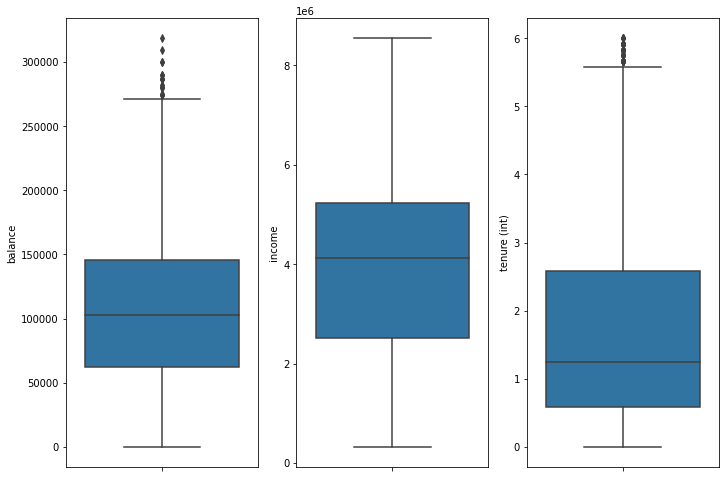

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(11.7, 8.27)
sns.boxplot(y=fixfix_train['balance'], ax=axs[0])
sns.boxplot(y=fixfix_train['income'], ax=axs[1])
sns.boxplot(y=fixfix_train['tenure (int)'], ax=axs[2])

In [219]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
3688    0
3689    0
3690    0
3691    0
3692    0
Name: default, Length: 3693, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


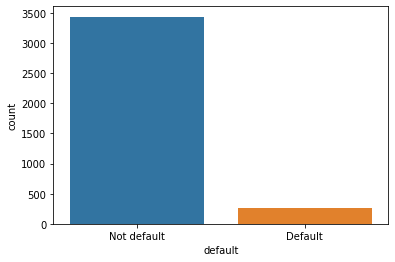

In [221]:
# visualize the target variable
g = sns.countplot(y_train)
g.set_xticklabels(['Not default','Default'])
plt.show()

#Modelling
* ROS
* RF
* Gridsearch

In [238]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(fixfix_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [239]:
X_ros.dtype

dtype('float64')

In [245]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()


classifier = clf.fit(X_ros, y_ros)
predictions = classifier.predict(fixfix_test)[1:,]

In [246]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,

In [247]:
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier()
param_grid = { 
    'n_estimators': [500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [248]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_ros, y_ros)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [249]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [250]:
rfc1=RandomForestClassifier(max_features='log2', n_estimators= 500, max_depth=8, criterion='gini')

In [251]:
classifier1 = rfc1.fit(X_ros, y_ros)
predictions1 = classifier1.predict(fixfix_test)[0:,]
predictions1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,

In [256]:
import numpy
numpy.savetxt("submission.csv", predictions1, delimiter=",", header='default')

In [257]:
submission_example = pd.read_csv('/content/submission.csv')
submission_example

,# default
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
302,1.0
303,0.0
304,0.0
305,0.0


In [258]:
#indexing
X_index = test
index = test['customer_id']
index

0      9365
1       999
2      2835
3      5821
4      2330
       ... 
302    7494
303     630
304    1978
305     582
306    3190
Name: customer_id, Length: 307, dtype: int64

In [285]:
#combine
import pandas as pd

fixsub = pd.concat([index, submission_example], axis=1, join='inner')
fixsub['# default'] = fixsub['# default'].astype(int)
fixsub

,customer_id,# default
0,9365,0
1,999,0
2,2835,0
3,5821,0
4,2330,0
...,...,...
302,7494,1
303,630,0
304,1978,0
305,582,0


In [286]:
fixsub.dtypes
#kayanya dtype nya harus int atau gmn ya

customer_id    int64
# default      int64
dtype: object

In [287]:
numpy.savetxt("submission.csv", fixsub, delimiter=",", header = 'customer_id,default', comments="")

In [288]:
submission_example = pd.read_csv('/content/submission.csv')
submission_example

,customer_id,default
0,9365.0,0.0
1,999.0,0.0
2,2835.0,0.0
3,5821.0,0.0
4,2330.0,0.0
...,...,...
302,7494.0,1.0
303,630.0,0.0
304,1978.0,0.0
305,582.0,0.0


In [294]:
submission_example['default'] = submission_example['default'].astype(int)
submission_example['customer_id'] = submission_example['customer_id'].astype(int)

In [295]:
submission_example.to_csv('submission.csv', index = False)
submission_example.dtypes

customer_id    int64
default        int64
dtype: object

#Model Trial (harusnya didepan_

In [297]:
# split imbalanced dataset into train and test sets with stratification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_ros, y_ros, test_size=0.2, random_state=1)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(5500, 12) (1376, 12) (5500,) (1376,)


In [299]:
CV_rfc2 = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc2.fit(X_train2, y_train2)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [301]:
CV_rfc2.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [302]:
rfc3=RandomForestClassifier(max_features='sqrt', n_estimators= 500, max_depth=8, criterion='gini')

In [306]:
# make predictions
from sklearn.metrics import accuracy_score

yhat = rfc3.fit(X_train2, y_train2)
yhat = CV_rfc2.predict(X_test2)
# evaluate predictions
acc = accuracy_score(y_test2, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 0.965
